In [1]:
import cv2
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.model_selection import train_test_split
import os
import glob
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('HousesDataset/HousesInfo.txt', header=None, sep=' ', names=['bedrooms', 'bathrooms', 'area', 'zipcode', 'price'])

In [4]:
data

,bedrooms,bathrooms,area,zipcode,price
0,4,4.0,4053,85255,869500
1,4,3.0,3343,36372,865200
2,3,4.0,3923,85266,889000
3,5,5.0,4022,85262,910000
4,3,4.0,4116,85266,971226
...,...,...,...,...,...
530,5,2.0,2066,94531,399900
531,4,3.5,9536,94531,460000
532,3,2.0,2014,94531,407000
533,4,3.0,2312,94531,419000


In [6]:
data.index.values + 1

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [7]:
sorted(list(glob.glob(os.path.sep.join(['HousesDataset', "{}_*".format(1)]))))

['HousesDataset\\1_bathroom.jpg',
 'HousesDataset\\1_bedroom.jpg',
 'HousesDataset\\1_frontal.jpg',
 'HousesDataset\\1_kitchen.jpg']

In [8]:
images = []
for i in data.index.values:
    basepath = os.path.sep.join(['HousesDataset', "{}_*".format(i + 1)]) # Construct the base path for image files
    imgPaths = sorted(list(glob.glob(basepath))) # Get all image paths matching the base path
    inputImages = []
    for imgPath in imgPaths:
        image = cv2.resize(cv2.imread(imgPath), (40, 40)) # Read and resize each image
        inputImages.append(image)
    outputImage = np.zeros((80, 80, 3), dtype='uint8') # Create an output image
    outputImage[0:40, 0:40] = inputImages[0]
    outputImage[0:40, 40:80] = inputImages[1]
    outputImage[40:80, 40:80] = inputImages[2]
    outputImage[40:80, 0:40] = inputImages[3]
    images.append(outputImage)

In [9]:
images = np.array(images)
images.shape

(535, 80, 80, 3)

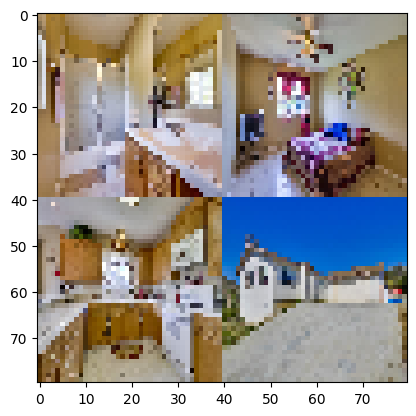

In [10]:
plt.imshow(images[100][..., ::-1])

In [11]:
X_train, X_test, IX_train, IX_test = train_test_split(data, images, random_state=400) # Split the data into training and testing sets

In [12]:
maxPrice = X_train['price'].max()
y_train = X_train['price'] / maxPrice
y_test = X_test['price'] / maxPrice

In [13]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import concatenate, Input, Conv2D, MaxPooling2D, Activation, Dense, Flatten, Dropout, BatchNormalization

ساختن مدل چنل تصاویر

In [ ]:
input1 = Input(shape=(80, 80, 3))
conv1 = Conv2D(16, (3, 3), padding='same', activation='relu')(input1)
batchnorm1 = BatchNormalization(axis=-1)(conv1) # Batch normalization after first convolution
maxpool1 = MaxPooling2D(pool_size=(2, 2))(batchnorm1)

conv2 = Conv2D(32, (3, 3), padding='same', activation='relu')(maxpool1)
batchnorm2 = BatchNormalization(axis=-1)(conv2) # Batch normalization after second convolution
maxpool2 = MaxPooling2D(pool_size=(2, 2))(batchnorm2)

conv3 = Conv2D(64, (3, 3), padding='same', activation='relu')(maxpool2)
batchnorm3 = BatchNormalization(axis=-1)(conv3)
maxpool3 = MaxPooling2D(pool_size=(2, 2))(batchnorm3)

flatten1 = Flatten()(maxpool3)
dense1 = Dense(32, activation='relu')(flatten1)
batchnorm4 = BatchNormalization(axis=-1)(dense1)
dropout1 = Dropout(0.5)(batchnorm4)
dense2 = Dense(16, activation='relu')(dropout1)

In [15]:
m1 = Model(input1, dense2)

In [16]:
m1.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 80, 80, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 80, 80, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 80, 80, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 40, 40, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 40, 40, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 40, 40, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 20, 20, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 20, 20, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 20, 20, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       204,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 229,520 (896.56 KB)

 Trainable params: 229,232 (895.44 KB)

 Non-trainable params: 288 (1.12 KB)

In [17]:
ss = StandardScaler()
Xtr = ss.fit_transform(X_train[['bedrooms', 'bathrooms', 'area']])
Xte = ss.transform(X_test[['bedrooms', 'bathrooms', 'area']])

In [18]:
lb = LabelBinarizer()
lb.fit(data['zipcode'])
Xtrz = lb.transform(X_train['zipcode'])
Xtez = lb.transform(X_test['zipcode'])

In [19]:
Xtrz[100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0])

In [20]:
Xtr = np.hstack([Xtr, Xtrz])
Xte = np.hstack([Xte, Xtez])

In [21]:
Xtr[0]

array([-1.15599532, -1.15802916, -0.46367076,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ])

In [22]:
Xtr.shape

(401, 52)

ساخت مدل فایل دیتا

In [27]:
input2 = Input(shape=(52,))
dense2_1 = Dense(16, activation='relu')(input2)
dropout2_1 = Dropout(0.5)(dense2_1)
dense2_2 = Dense(8, activation='relu')(dropout2_1)
dense2_3 = Dense(4, activation='relu')(dense2_2)



In [29]:
m2 = Model(input2, dense2_3)

In [30]:
m2.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 52)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,020 (3.98 KB)

 Trainable params: 1,020 (3.98 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
combinedModel = concatenate([m2.output, m1.output])

In [32]:
densef1 = Dense(8, activation='relu')(combinedModel)
densef2 = Dense(1, activation='linear')(densef1)
model = Model(inputs=[m2.input, m1.input], outputs=densef2)

In [33]:
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 80, 80, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 80, 80,    │        448 │ input_layer[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 80, 80,    │         64 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 40, 40,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 40, 40,    │      4,640 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 40, 40,    │        128 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 20, 20,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 20, 20,    │     18,496 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 20, 20,    │        256 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 10, 10,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_2       │ (None, 52)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 6400)      │          0 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 16)        │        848 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 32)        │    204,832 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 16)        │          0 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 8)         │        136 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 32)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 4)         │         36 │ dense_6[0][0]   

 Total params: 230,717 (901.24 KB)

 Trainable params: 230,429 (900.11 KB)

 Non-trainable params: 288 (1.12 KB)

In [34]:
from tensorflow.keras.utils import plot_model

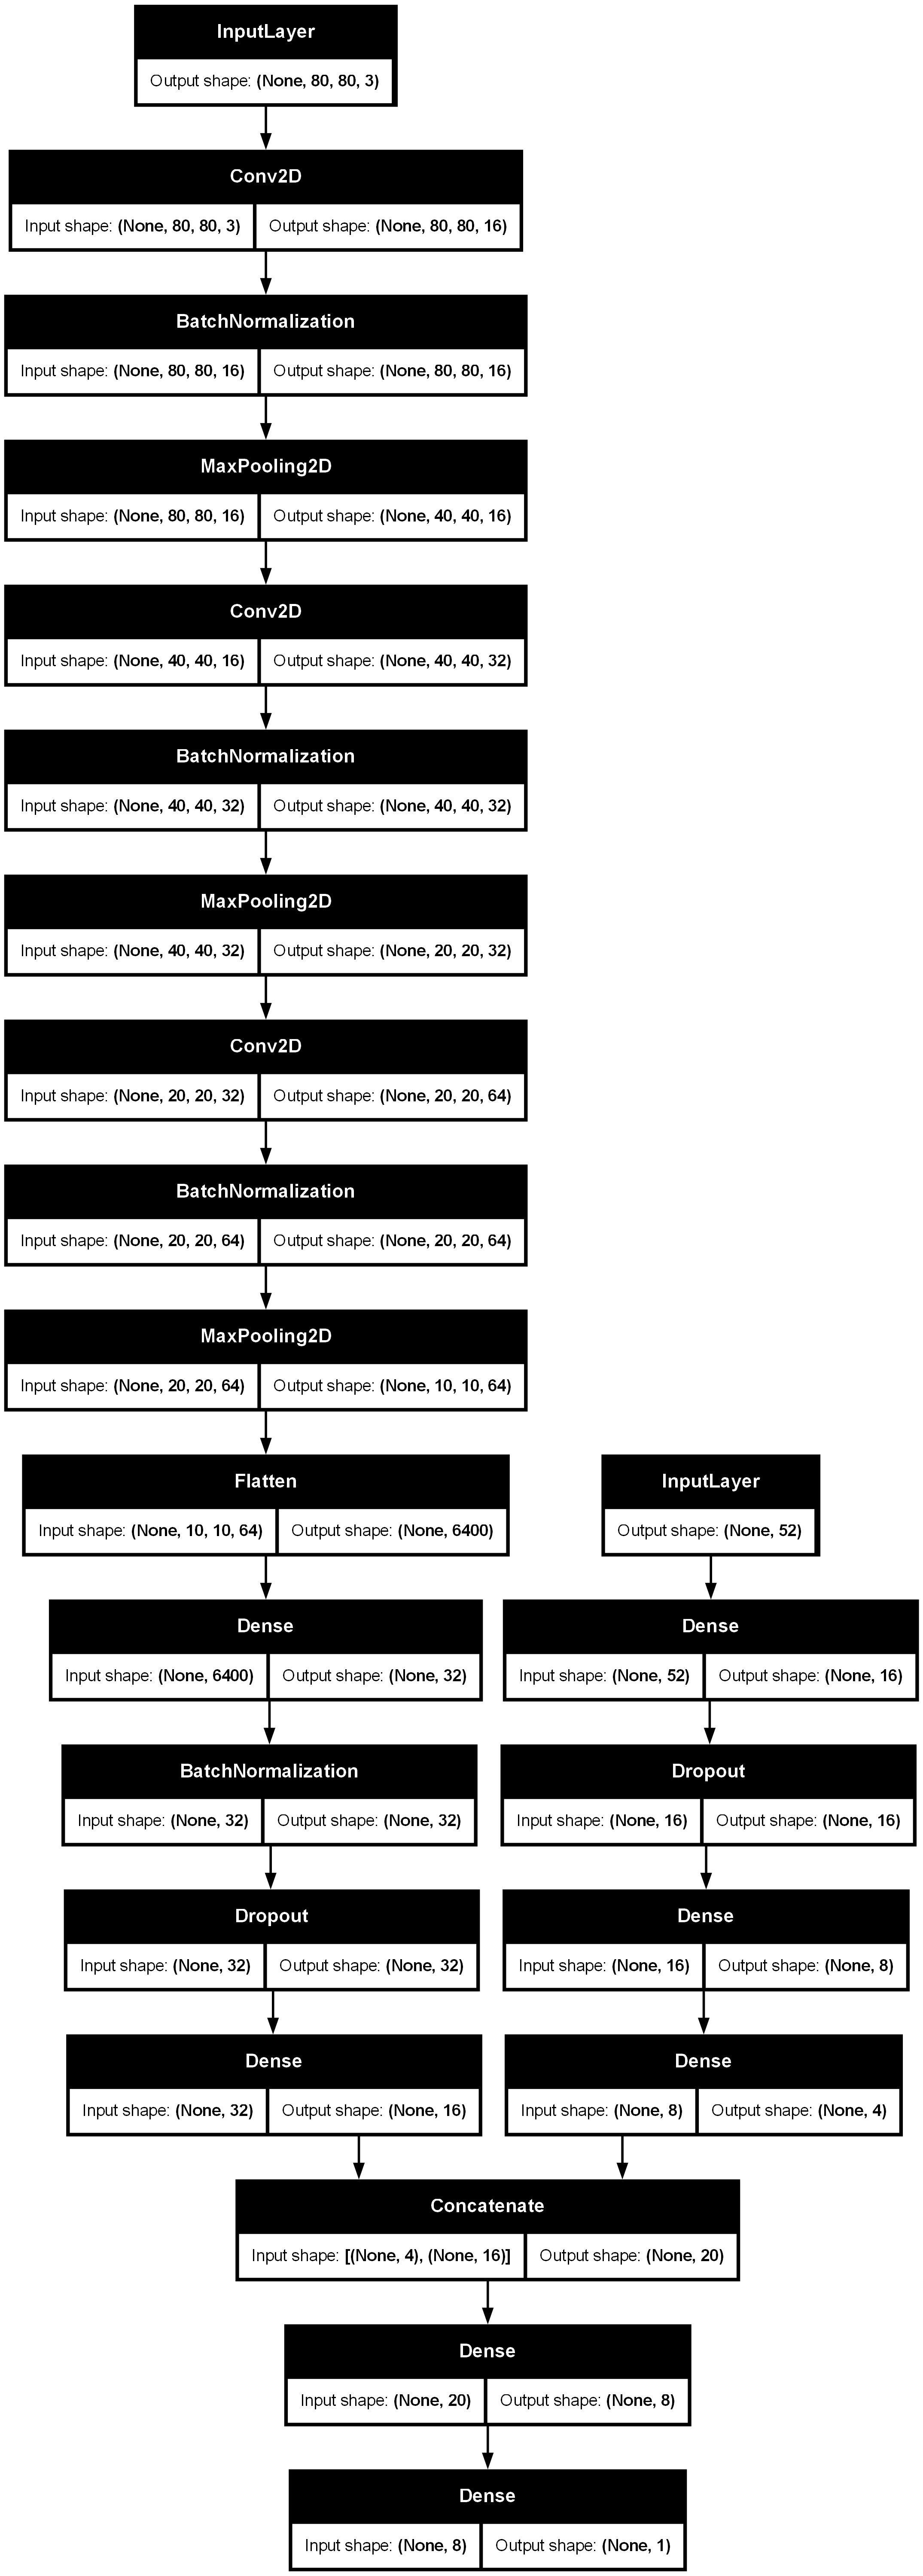

In [35]:
plot_model(model, show_shapes=True)

In [36]:
model.compile(loss='mean_absolute_error', optimizer='adam')

In [37]:
history = model.fit([Xtr, IX_train], y_train, validation_data=([Xte, IX_test], y_test), epochs=100, batch_size=10)

Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3224 - val_loss: 0.6072
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1748 - val_loss: 0.1143
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1095 - val_loss: 0.0825
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0935 - val_loss: 0.1105
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0929 - val_loss: 0.0789
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0784 - val_loss: 0.0570
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0764 - val_loss: 0.0536
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0705 - val_loss: 0.0488
Epoch 9/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0639 - val_loss: 0.0490
Epoch 10/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0595 - val_loss: 0.0502
Epoch 11/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0593 - val_loss: 0.0453
Epoch 12/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step

In [38]:
predicts = model.predict([Xte, IX_test]) * maxPrice
predicts

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


array([[ 619090.26555717],
       [ 849153.77646685],
       [ 627455.84240556],
       [ 488179.20747399],
       [ 424768.40469241],
       [ 316431.7599982 ],
       [ 608236.32775247],
       [ 504007.20481575],
       [ 476582.20501244],
       [ 508736.41309142],
       [ 699003.21409106],
       [ 312716.00025892],
       [ 531126.9916296 ],
       [ 622436.04238331],
       [ 596079.57173884],
       [ 582883.87821615],
       [ 658147.18422294],
       [ 611543.82747412],
       [1093734.95948315],
       [ 260009.47485864],
       [ 433384.20119882],
       [ 609698.97578657],
       [ 633591.09050035],
       [ 749839.74799514],
       [ 466280.07727861],
       [ 600813.23185563],
       [ 429678.5235703 ],
       [ 192524.71370995],
       [1221208.9779973 ],
       [ 714781.80472553],
       [ 314895.76569945],
       [ 799704.12200689],
       [ 867022.94296026],
       [ 316012.67589629],
       [ 272073.13501835],
       [ 414911.76658869],
       [ 630416.27310216],
 

In [39]:
predicts.flatten()

array([ 619090.26555717,  849153.77646685,  627455.84240556,
        488179.20747399,  424768.40469241,  316431.7599982 ,
        608236.32775247,  504007.20481575,  476582.20501244,
        508736.41309142,  699003.21409106,  312716.00025892,
        531126.9916296 ,  622436.04238331,  596079.57173884,
        582883.87821615,  658147.18422294,  611543.82747412,
       1093734.95948315,  260009.47485864,  433384.20119882,
        609698.97578657,  633591.09050035,  749839.74799514,
        466280.07727861,  600813.23185563,  429678.5235703 ,
        192524.71370995, 1221208.9779973 ,  714781.80472553,
        314895.76569945,  799704.12200689,  867022.94296026,
        316012.67589629,  272073.13501835,  414911.76658869,
        630416.27310216,  710046.5733707 ,  815648.17273617,
        245013.14254105,  694200.89960098,  604276.76424384,
       1214221.50784731,  577024.68791604,  478427.14399099,
        534009.07865167,  452596.25247121,  317346.96251154,
        992394.03393865,

In [40]:
y_test.values * maxPrice

array([ 525000.,  669000.,  489900.,  625000.,  429900., 1795000.,
        535000.,  479000.,  195000.,  529000.,  599900.,  259000.,
        409900.,  489000.,  569000., 1550000.,  859000.,  529999.,
        875000.,  125000.,  265000.,  769000.,  568000.,  897000.,
        515000.,  619000.,  458000.,  303590.,  759000.,  567000.,
        104900., 1080000.,  460000.,  325000.,   94500.,  520000.,
        530000.,  738000.,  520000.,   99900.,  595999., 1695000.,
       1895000.,  499000.,  625000.,  520000.,  339000.,  160000.,
        599999.,   89900.,  534977.,  680000., 1199000.,  575000.,
        639000.,  115000.,  567500.,  749000.,  999000.,  468000.,
        619000.,  925000., 1039000.,  186500.,  699500.,  520000.,
        104900.,  759000.,  229000., 2150000.,  560000.,  122500.,
        139500.,  599000.,  225000.,  245900.,  124900.,  895000.,
        647000.,  135000.,  669472.,  224900.,  695000.,  319000.,
        529900.,  865200.,  380000.,  529000.,  158888.,  6359

In [41]:
diff = abs(predicts.flatten() - (y_test * maxPrice))

In [42]:
diff

525     94090.265557
110    180153.776467
459    137555.842406
194    136820.792526
114      5131.595308
           ...      
119    158879.256174
354    159659.905320
523      8785.902070
158     84543.742819
45      54575.937226
Name: price, Length: 134, dtype: float64

In [43]:
diff.mean()

np.float64(179299.66597831427)

In [44]:
data['price'].mean()

np.float64(589362.8112149533)

In [45]:
data['price'].std()

np.float64(509026.06764905667)

In [46]:
from sklearn.metrics import r2_score, mean_absolute_error

In [47]:
r2_score(y_pred=predicts.flatten(), y_true=(y_test * maxPrice))

0.39697782746780674

خطای ما 179 هزار دلار


In [48]:
abs(model.predict([Xte, IX_test]).flatten() - y_test).mean() * maxPrice

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


np.float64(179299.66597831427)